In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lr_data = pd.read_csv('fin_res_lr.csv')
nb_data = pd.read_csv('fin_res_nb.csv')
knn_data = pd.read_csv('fin_res_knn.csv')
dt_data = pd.read_csv('fin_res_dt.csv')
rf_data = pd.read_csv('fin_res_rf.csv')

In [3]:
lr_data = lr_data.set_index('models')
nb_data = nb_data.set_index('models')
knn_data = knn_data.set_index('models')
dt_data = dt_data.set_index('models')
rf_data = rf_data.set_index('models')

In [4]:
fin_res = pd.concat([lr_data,nb_data,knn_data,dt_data,rf_data],axis=0)

In [5]:
fin_res.to_csv('fin_res.csv')

In [6]:
fin_res

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Logistic Regression,0.840137,0.789227,0.637340,0.878732
Logistic Regression_RS CV,0.837739,0.797626,0.615351,0.877188
Bagged_LR,0.840451,0.790464,0.637012,0.879199
Boosted_LR,0.806719,0.757048,0.523567,0.855315
Logistic Regression_OC,0.828448,0.716490,0.708679,0.794235
Logistic Regression_RS CV_OC,0.828448,0.716490,0.708679,0.794235
Bagged_LR_OC,0.829626,0.717420,0.713040,0.796322
Boosted_LR_OC,0.812614,0.785288,0.516790,0.728109
Naive Bayes Classifier,0.590509,0.411543,0.843611,0.808660


In [7]:
models = fin_res.index.values

In [8]:
len(models)

30

In [9]:
base_models = []
base_models_optimized = []
randomsearch_models = []
randomsearch_models_optimized = []
bagged_model = []
boosted_models = []

for i in models:
    
    if 'CV' in i:
        if 'CV_OC' in i:
            randomsearch_models_optimized.append(i)
        else: 
            randomsearch_models.append(i)
    
    elif 'boost' in i or 'Boost' in i:
        boosted_models.append(i)

    elif 'bagg' in i or 'Bagg' in i:
        bagged_model.append(i)
    
    else:
        if 'OC' in i:
            base_models_optimized.append(i)
        else:
            base_models.append(i)

In [10]:
print(bagged_model)
print(len(bagged_model))

['Bagged_LR', 'Bagged_LR_OC', 'Bagged_NB', 'Bagged_NB_OC']
4


In [11]:
print(boosted_models)
print(len(boosted_models))

['Boosted_LR', 'Boosted_LR_OC', 'boosted_NB', 'boosted_NB_OC', 'boosted_DT', 'boosted_DT_OC', 'Boosted_RF', 'Boosted_RF_OC']
8


In [12]:
print(randomsearch_models)
print(len(randomsearch_models))

['Logistic Regression_RS CV', 'Knn with Randomsearch CV', 'Decision Tree Classifier with Randomsearch CV', 'Random Forest Classifier with Randomsearch CV']
4


In [13]:
print(randomsearch_models_optimized)
print(len(randomsearch_models_optimized))

['Logistic Regression_RS CV_OC', 'Knn with Randomsearch CV_OC', 'Decision Tree Classifier with Randomsearch CV_OC', 'Random Forest Classifier with Randomsearch CV_OC']
4


In [14]:
print(base_models_optimized)
print(len(base_models_optimized))

['Logistic Regression_OC', 'Naive Bayes Classifier_OC', 'K-Nearest Neighbor Classifier_OC', 'Decision Tree Classifier_OC', 'Random Forest Classifier_OC']
5


In [15]:
print(base_models)
print(len(base_models))

['Logistic Regression', 'Naive Bayes Classifier', 'K-Nearest Neighbor Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
5


In [16]:
base_model_df = fin_res.loc[base_models]
base_model_df

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Logistic Regression,0.840137,0.789227,0.637340,0.878732
Naive Bayes Classifier,0.590509,0.411543,0.843611,0.808660
K-Nearest Neighbor Classifier,0.721761,0.555890,0.359718,0.682774
Decision Tree Classifier,0.779131,0.631316,0.632951,0.737395
Random Forest Classifier,0.831753,0.822453,0.559963,0.873447


<ipython-input-17-7e5a9ea95d83>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-17-7e5a9ea95d83>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-17-7e5a9ea95d83>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

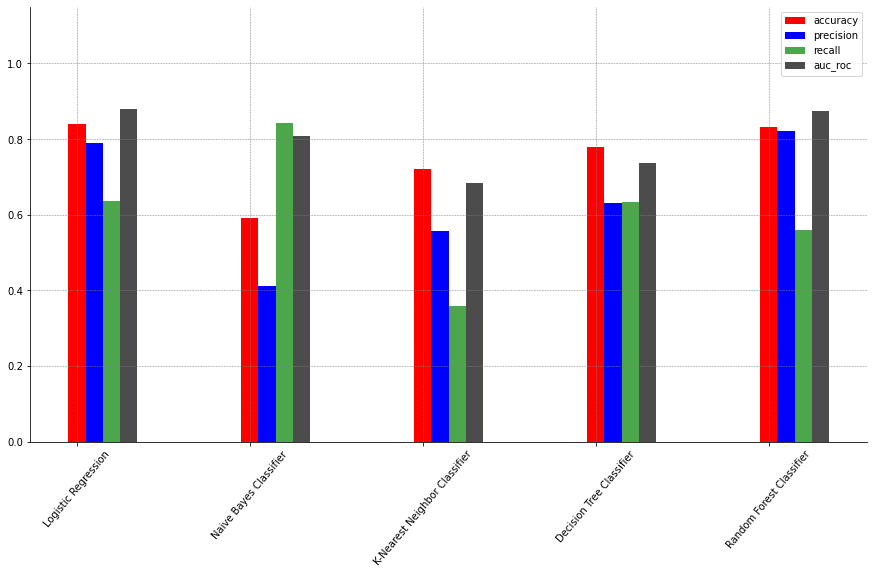

In [17]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(111)

models = base_model_df.index
values = list(base_model_df['Accuracy'])
model = np.arange(len(base_model_df))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = base_model_df.index
values = list(base_model_df['Precision'])
model = np.arange(len(base_model_df))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = base_model_df.index
values = list(base_model_df['Recall'])
model = np.arange(len(base_model_df))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = base_model_df.index
values = list(base_model_df['AUC_ROC'])
model = np.arange(len(base_model_df))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc')
plt.xticks(model, models,rotation=50,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [18]:
base_models_optimized_df = fin_res.loc[base_models_optimized]
base_models_optimized_df

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Logistic Regression_OC,0.828448,0.716490,0.708679,0.794235
Naive Bayes Classifier_OC,0.644334,0.446862,0.779328,0.682897
K-Nearest Neighbor Classifier_OC,0.816409,0.683128,0.723942,0.789995
Decision Tree Classifier_OC,0.804501,0.660635,0.716529,0.779371
Random Forest Classifier_OC,0.832243,0.720454,0.720454,0.800309


<ipython-input-19-1a0c0be1e88b>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-19-1a0c0be1e88b>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-19-1a0c0be1e88b>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

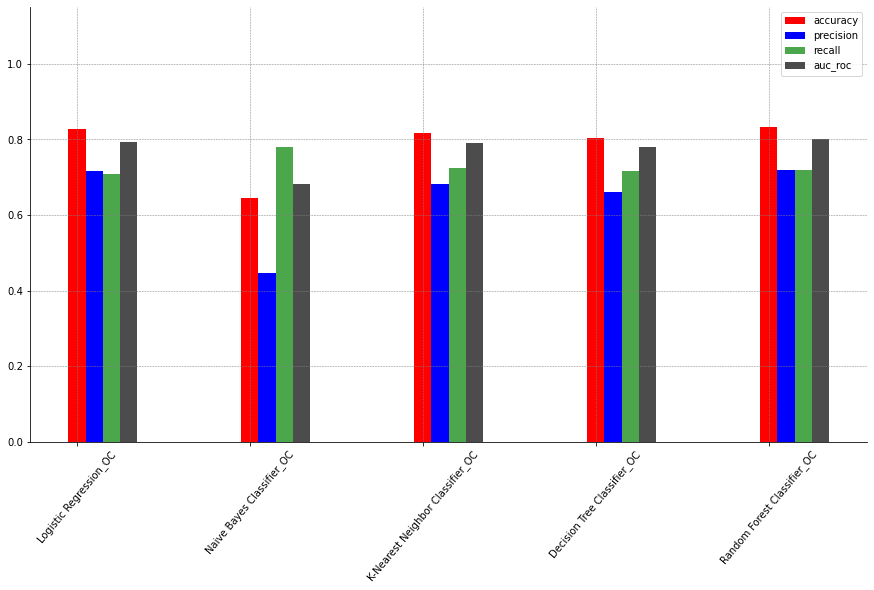

In [19]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(111)

models = base_models_optimized_df.index
values = list(base_models_optimized_df['Accuracy'])
model = np.arange(len(base_models_optimized_df))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = base_models_optimized_df.index
values = list(base_models_optimized_df['Precision'])
model = np.arange(len(base_models_optimized_df))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = base_models_optimized_df.index
values = list(base_models_optimized_df['Recall'])
model = np.arange(len(base_models_optimized_df))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = base_models_optimized_df.index
values = list(base_models_optimized_df['AUC_ROC'])
model = np.arange(len(base_models_optimized_df))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc')
plt.xticks(model, models,rotation=50,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [20]:
randomsearch_models_optimized_df = fin_res.loc[randomsearch_models_optimized]
randomsearch_models_optimized_df

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Logistic Regression_RS CV_OC,0.828448,0.716490,0.708679,0.794235
Knn with Randomsearch CV_OC,0.833252,0.715146,0.738306,0.806127
Decision Tree Classifier with Randomsearch CV_OC,0.811954,0.683973,0.693817,0.778204
Random Forest Classifier with Randomsearch CV_OC,0.765139,0.606684,0.617599,0.722989


<ipython-input-21-25a334e4e5a0>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-21-25a334e4e5a0>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-21-25a334e4e5a0>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

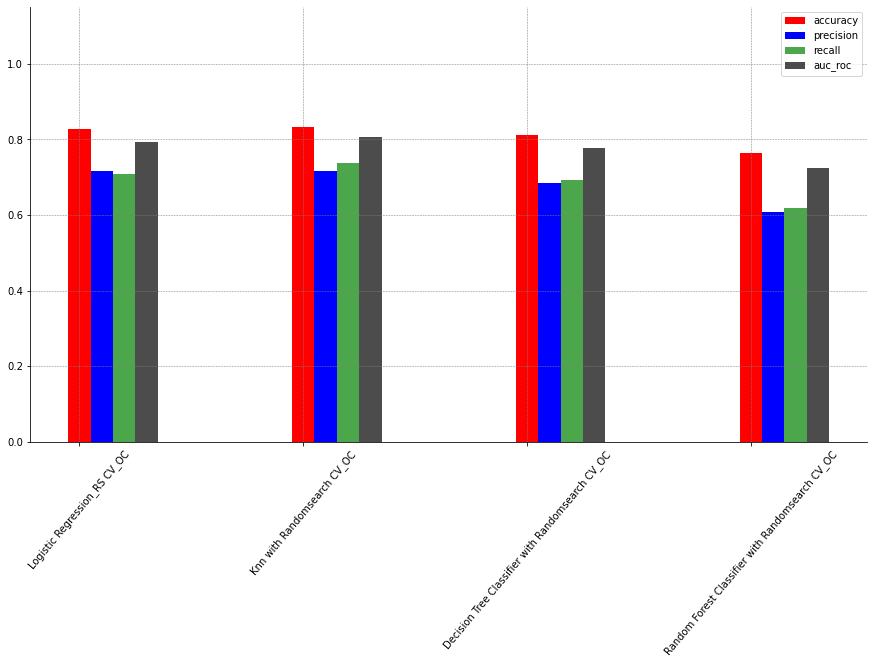

In [21]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(111)

models = randomsearch_models_optimized_df.index
values = list(randomsearch_models_optimized_df['Accuracy'])
model = np.arange(len(randomsearch_models_optimized_df))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = randomsearch_models_optimized_df.index
values = list(randomsearch_models_optimized_df['Precision'])
model = np.arange(len(randomsearch_models_optimized_df))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = randomsearch_models_optimized_df.index
values = list(randomsearch_models_optimized_df['Recall'])
model = np.arange(len(randomsearch_models_optimized_df))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = randomsearch_models_optimized_df.index
values = list(randomsearch_models_optimized_df['AUC_ROC'])
model = np.arange(len(randomsearch_models_optimized_df))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc')
plt.xticks(model, models,rotation=50,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [22]:
randomsearch_models_df = fin_res.loc[randomsearch_models]
randomsearch_models_df

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Logistic Regression_RS CV,0.837739,0.797626,0.615351,0.877188
Knn with Randomsearch CV,0.764256,0.573021,0.840693,0.882952
Decision Tree Classifier with Randomsearch CV,0.814997,0.687101,0.703958,0.785702
Random Forest Classifier with Randomsearch CV,0.758072,0.835601,0.241086,0.823796


<ipython-input-23-6e80b07d5da2>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-23-6e80b07d5da2>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-23-6e80b07d5da2>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

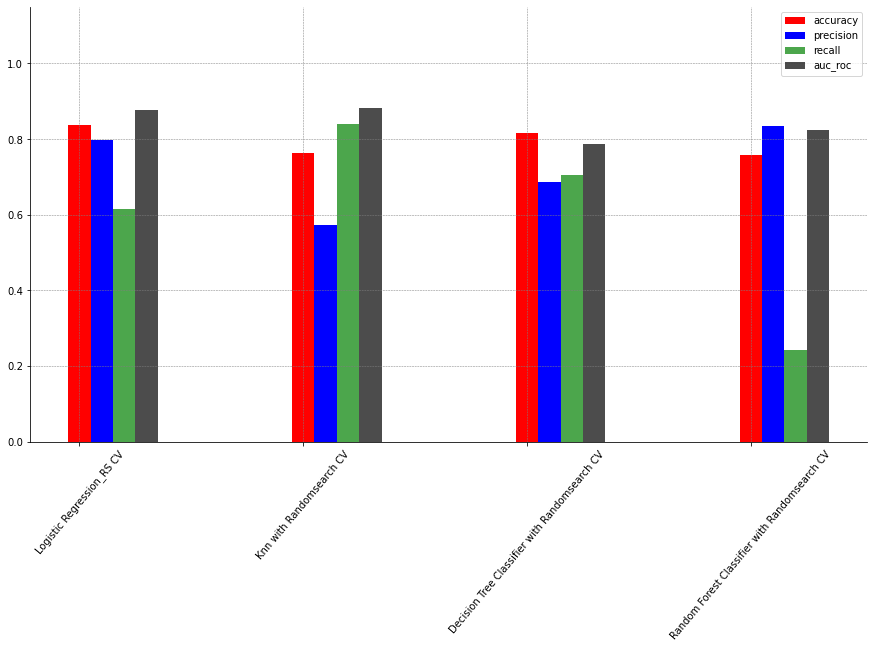

In [23]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(111)

models = randomsearch_models_df.index
values = list(randomsearch_models_df['Accuracy'])
model = np.arange(len(randomsearch_models_df))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = randomsearch_models_df.index
values = list(randomsearch_models_df['Precision'])
model = np.arange(len(randomsearch_models_df))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = randomsearch_models_df.index
values = list(randomsearch_models_df['Recall'])
model = np.arange(len(randomsearch_models_df))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = randomsearch_models_df.index
values = list(randomsearch_models_df['AUC_ROC'])
model = np.arange(len(randomsearch_models_df))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc')
plt.xticks(model, models,rotation=50,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [24]:
bagged_model_df = fin_res.loc[bagged_model]
bagged_model_df

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Bagged_LR,0.840451,0.790464,0.637012,0.879199
Bagged_LR_OC,0.829626,0.717420,0.713040,0.796322
Bagged_NB,0.548154,0.389116,0.863840,0.808096
Bagged_NB_OC,0.611882,0.424092,0.819887,0.671301


<ipython-input-25-876fbfbded43>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-25-876fbfbded43>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-25-876fbfbded43>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

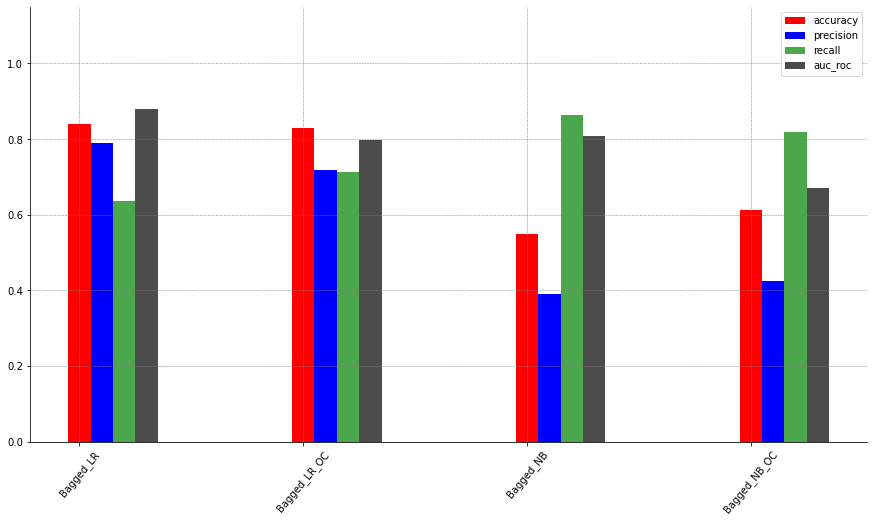

In [25]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(111)

models = bagged_model_df.index
values = list(bagged_model_df['Accuracy'])
model = np.arange(len(bagged_model_df))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = bagged_model_df.index
values = list(bagged_model_df['Precision'])
model = np.arange(len(bagged_model_df))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = bagged_model_df.index
values = list(bagged_model_df['Recall'])
model = np.arange(len(bagged_model_df))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = bagged_model_df.index
values = list(bagged_model_df['AUC_ROC'])
model = np.arange(len(bagged_model_df))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc')
plt.xticks(model, models,rotation=50,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [26]:
boosted_models_df = fin_res.loc[boosted_models]
boosted_models_df

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Boosted_LR,0.806719,0.757048,0.523567,0.855315
Boosted_LR_OC,0.812614,0.785288,0.516790,0.728109
boosted_NB,0.590291,0.411326,0.843021,0.808558
boosted_NB_OC,0.645512,0.448104,0.783253,0.684859
boosted_DT,0.811863,0.754999,0.552240,0.832885
boosted_DT_OC,0.857891,0.758458,0.772351,0.833455
Boosted_RF,0.864387,0.819823,0.702409,0.912479
Boosted_RF_OC,0.857105,0.814563,0.678151,0.805985


<ipython-input-27-c3c4f4e5beac>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-27-c3c4f4e5beac>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-27-c3c4f4e5beac>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

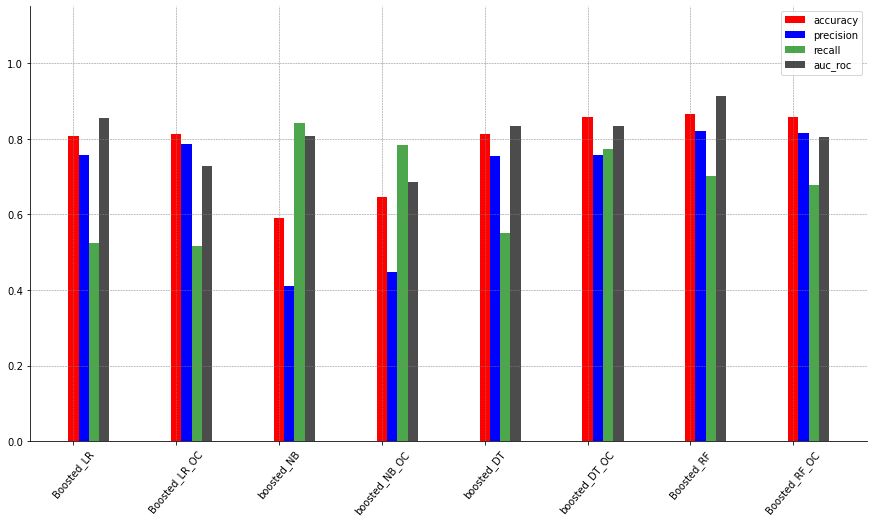

In [27]:
plt.figure(figsize=(15, 8))

ax = plt.subplot(111)

models = boosted_models_df.index
values = list(boosted_models_df['Accuracy'])
model = np.arange(len(boosted_models_df))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = boosted_models_df.index
values = list(boosted_models_df['Precision'])
model = np.arange(len(boosted_models_df))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = boosted_models_df.index
values = list(boosted_models_df['Recall'])
model = np.arange(len(boosted_models_df))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = boosted_models_df.index
values = list(boosted_models_df['AUC_ROC'])
model = np.arange(len(boosted_models_df))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc')
plt.xticks(model, models,rotation=50,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

<ipython-input-28-659bb3f0ce07>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-28-659bb3f0ce07>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-28-659bb3f0ce07>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

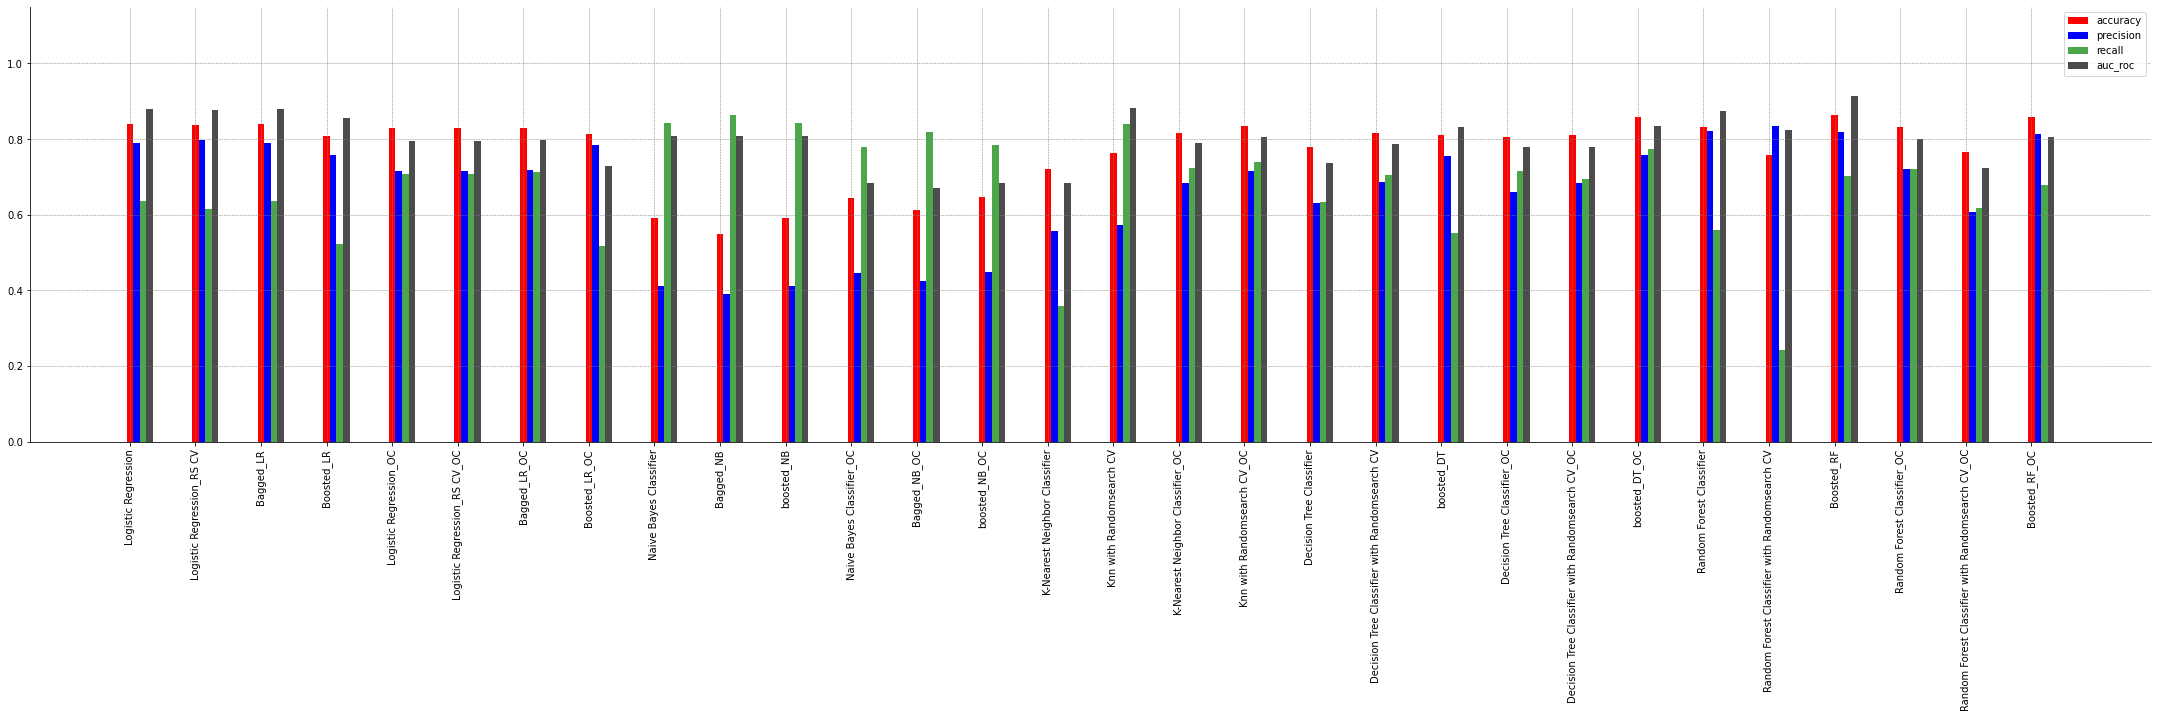

In [28]:
plt.figure(figsize=(38, 8))

ax = plt.subplot(111)

models = fin_res.index
values = list(fin_res['Accuracy'])
model = np.arange(len(fin_res))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = fin_res.index
values = list(fin_res['Precision'])
model = np.arange(len(fin_res))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = fin_res.index
values = list(fin_res['Recall'])
model = np.arange(len(fin_res))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = fin_res.index
values = list(fin_res['AUC_ROC'])
model = np.arange(len(fin_res))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc',orientation = 'vertical')
plt.xticks(model, models,rotation=90,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [29]:
lr_data

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Logistic Regression,0.840137,0.789227,0.637340,0.878732
Logistic Regression_RS CV,0.837739,0.797626,0.615351,0.877188
Bagged_LR,0.840451,0.790464,0.637012,0.879199
Boosted_LR,0.806719,0.757048,0.523567,0.855315
Logistic Regression_OC,0.828448,0.716490,0.708679,0.794235
Logistic Regression_RS CV_OC,0.828448,0.716490,0.708679,0.794235
Bagged_LR_OC,0.829626,0.717420,0.713040,0.796322
Boosted_LR_OC,0.812614,0.785288,0.516790,0.728109


<ipython-input-30-098208f5f3d8>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-30-098208f5f3d8>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-30-098208f5f3d8>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

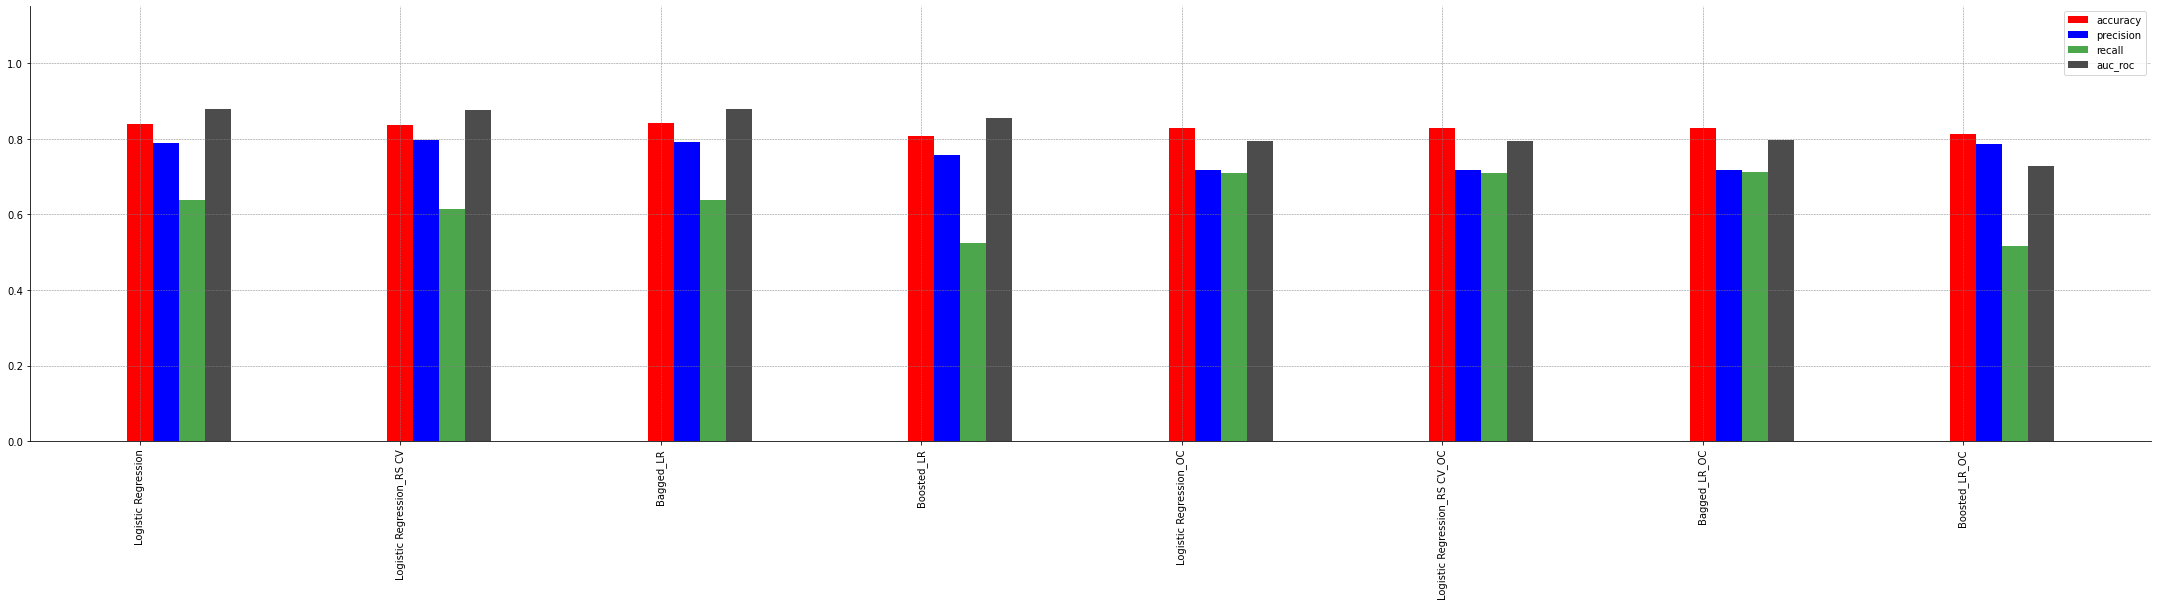

In [30]:
plt.figure(figsize=(38, 8))

ax = plt.subplot(111)

models = lr_data.index
values = list(lr_data['Accuracy'])
model = np.arange(len(lr_data))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = lr_data.index
values = list(lr_data['Precision'])
model = np.arange(len(lr_data))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = lr_data.index
values = list(lr_data['Recall'])
model = np.arange(len(lr_data))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = lr_data.index
values = list(lr_data['AUC_ROC'])
model = np.arange(len(lr_data))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc',orientation = 'vertical')
plt.xticks(model, models,rotation=90,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [31]:
nb_data

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Naive Bayes Classifier,0.590509,0.411543,0.843611,0.808660
Bagged_NB,0.548154,0.389116,0.863840,0.808096
boosted_NB,0.590291,0.411326,0.843021,0.808558
Naive Bayes Classifier_OC,0.644334,0.446862,0.779328,0.682897
Bagged_NB_OC,0.611882,0.424092,0.819887,0.671301
boosted_NB_OC,0.645512,0.448104,0.783253,0.684859


<ipython-input-32-6ca38c536109>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-32-6ca38c536109>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-32-6ca38c536109>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

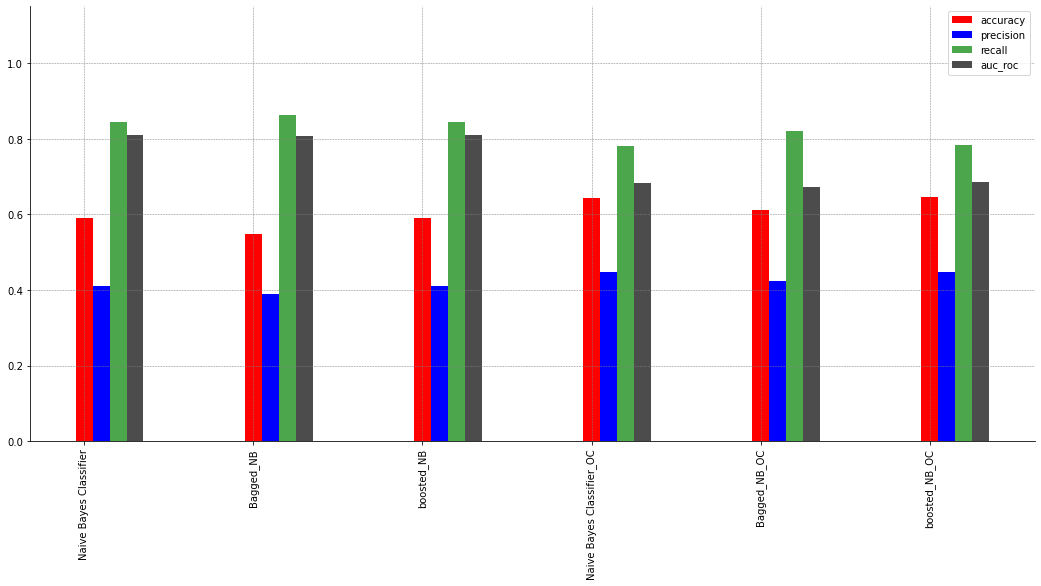

In [32]:
plt.figure(figsize=(18, 8))

ax = plt.subplot(111)

models = nb_data.index
values = list(nb_data['Accuracy'])
model = np.arange(len(nb_data))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = nb_data.index
values = list(nb_data['Precision'])
model = np.arange(len(nb_data))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = nb_data.index
values = list(nb_data['Recall'])
model = np.arange(len(nb_data))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = nb_data.index
values = list(nb_data['AUC_ROC'])
model = np.arange(len(nb_data))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc',orientation = 'vertical')
plt.xticks(model, models,rotation=90,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [33]:
knn_data

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
K-Nearest Neighbor Classifier,0.721761,0.555890,0.359718,0.682774
Knn with Randomsearch CV,0.764256,0.573021,0.840693,0.882952
K-Nearest Neighbor Classifier_OC,0.816409,0.683128,0.723942,0.789995
Knn with Randomsearch CV_OC,0.833252,0.715146,0.738306,0.806127


<ipython-input-34-e90510308dc2>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-34-e90510308dc2>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-34-e90510308dc2>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

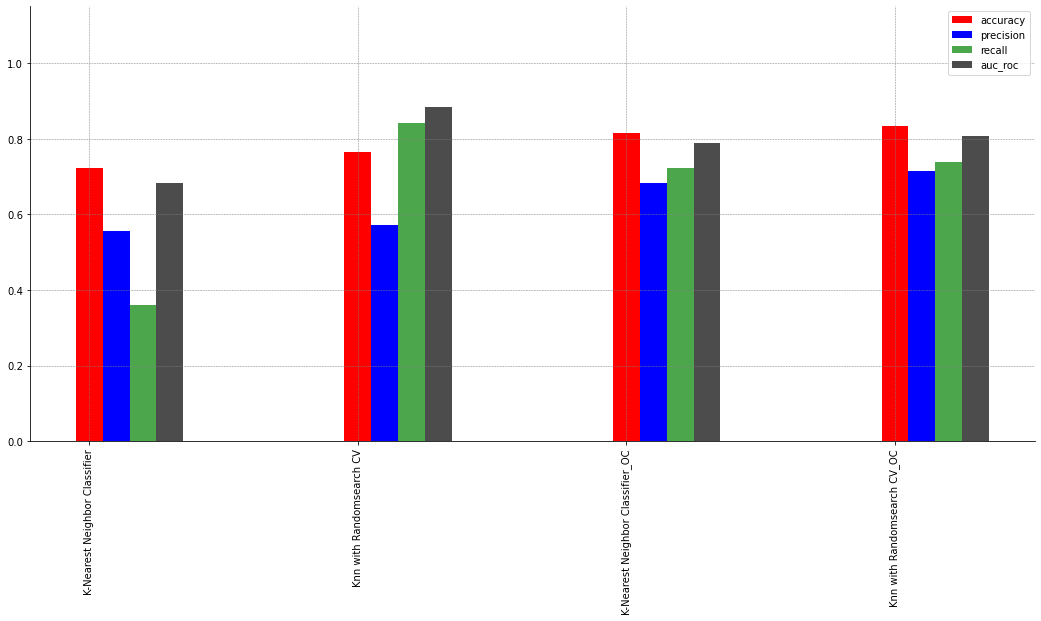

In [34]:
plt.figure(figsize=(18, 8))

ax = plt.subplot(111)

models = knn_data.index
values = list(knn_data['Accuracy'])
model = np.arange(len(knn_data))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = knn_data.index
values = list(knn_data['Precision'])
model = np.arange(len(knn_data))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = knn_data.index
values = list(knn_data['Recall'])
model = np.arange(len(knn_data))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = knn_data.index
values = list(knn_data['AUC_ROC'])
model = np.arange(len(knn_data))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc',orientation = 'vertical')
plt.xticks(model, models,rotation=90,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [35]:
dt_data

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Decision Tree Classifier,0.779131,0.631316,0.632951,0.737395
Decision Tree Classifier with Randomsearch CV,0.814997,0.687101,0.703958,0.785702
boosted_DT,0.811863,0.754999,0.552240,0.832885
Decision Tree Classifier_OC,0.804501,0.660635,0.716529,0.779371
Decision Tree Classifier with Randomsearch CV_OC,0.811954,0.683973,0.693817,0.778204
boosted_DT_OC,0.857891,0.758458,0.772351,0.833455


<ipython-input-36-ad3e9c22a686>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-36-ad3e9c22a686>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-36-ad3e9c22a686>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

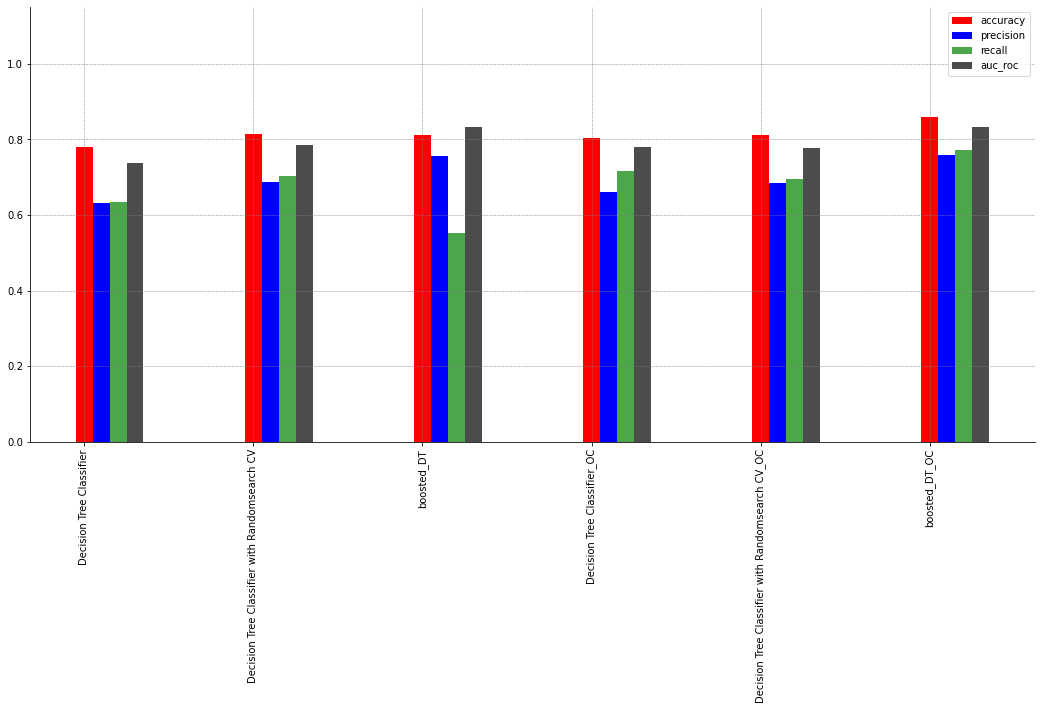

In [36]:
plt.figure(figsize=(18, 8))

ax = plt.subplot(111)

models = dt_data.index
values = list(dt_data['Accuracy'])
model = np.arange(len(dt_data))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = dt_data.index
values = list(dt_data['Precision'])
model = np.arange(len(dt_data))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = dt_data.index
values = list(dt_data['Recall'])
model = np.arange(len(dt_data))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = dt_data.index
values = list(dt_data['AUC_ROC'])
model = np.arange(len(dt_data))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc',orientation = 'vertical')
plt.xticks(model, models,rotation=90,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [37]:
rf_data

,Accuracy,Precision,Recall,AUC_ROC
models,,,,
Random Forest Classifier,0.831753,0.822453,0.559963,0.873447
Random Forest Classifier with Randomsearch CV,0.758072,0.835601,0.241086,0.823796
Boosted_RF,0.864387,0.819823,0.702409,0.912479
Random Forest Classifier_OC,0.832243,0.720454,0.720454,0.800309
Random Forest Classifier with Randomsearch CV_OC,0.765139,0.606684,0.617599,0.722989
Boosted_RF_OC,0.857105,0.814563,0.678151,0.805985


<ipython-input-38-11baffcb2049>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-38-11baffcb2049>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-38-11baffcb2049>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

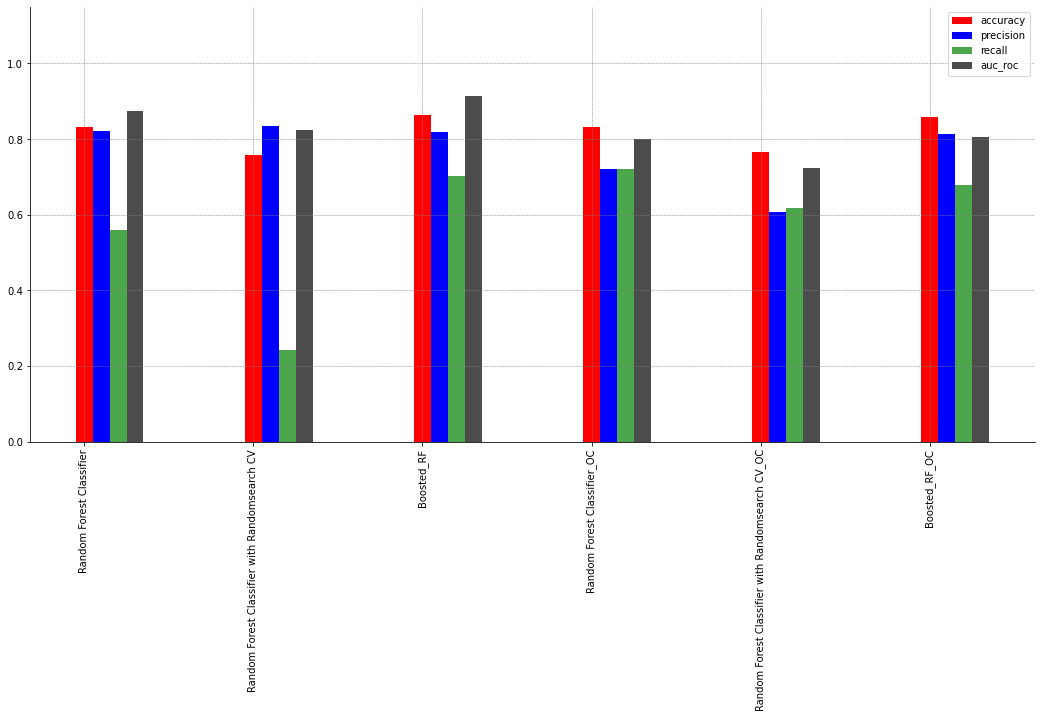

In [38]:
plt.figure(figsize=(18, 8))

ax = plt.subplot(111)

models = rf_data.index
values = list(rf_data['Accuracy'])
model = np.arange(len(rf_data))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = rf_data.index
values = list(rf_data['Precision'])
model = np.arange(len(rf_data))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = rf_data.index
values = list(rf_data['Recall'])
model = np.arange(len(rf_data))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = rf_data.index
values = list(rf_data['AUC_ROC'])
model = np.arange(len(rf_data))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc',orientation = 'vertical')
plt.xticks(model, models,rotation=90,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [39]:
fin_comp = pd.read_excel('final_model_compare.xlsx')

In [40]:
fin_comp= fin_comp.set_index('Model')

<ipython-input-41-628cb0a6449c>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-41-628cb0a6449c>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-41-628cb0a6449c>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

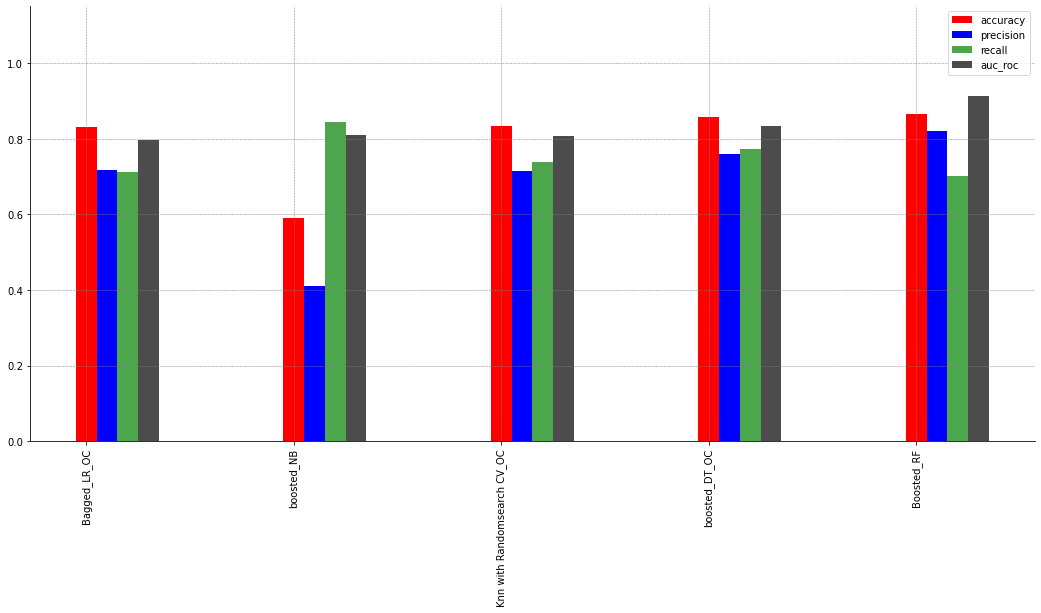

In [41]:
plt.figure(figsize=(18, 8))

ax = plt.subplot(111)

models = fin_comp.index
values = list(fin_comp['Accuracy'])
model = np.arange(len(fin_comp))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'accuracy')
#----------------
ax = plt.subplot(111)

models = fin_comp.index
values = list(fin_comp['Precision'])
model = np.arange(len(fin_comp))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'precision')
#----------------
ax = plt.subplot(111)

models = fin_comp.index
values = list(fin_comp['Recall'])
model = np.arange(len(fin_comp))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'Green', label= 'recall')
#----------------
ax = plt.subplot(111)

models = fin_comp.index
values = list(fin_comp['AUC_ROC'])
model = np.arange(len(fin_comp))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.7, color = 'black', label= 'auc_roc',orientation = 'vertical')
plt.xticks(model, models,rotation=90,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [42]:
fin_comp2 = pd.read_excel('final_model_compare.xlsx')
fin_comp2 = fin_comp2.set_index('Model')

In [49]:
fin_comp2 = fin_comp2.T

In [51]:
fin_comp2

Model,Bagged_LR_OC,boosted_NB,Knn with Randomsearch CV_OC,boosted_DT_OC,Boosted_RF
Accuracy,0.829626,0.590291,0.833252,0.857891,0.864387
Precision,0.717420,0.411326,0.715146,0.758458,0.819823
Recall,0.713040,0.843021,0.738306,0.772351,0.702409
AUC_ROC,0.796322,0.808558,0.806127,0.833455,0.912479


<ipython-input-59-12f60f14a447>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-59-12f60f14a447>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-59-12f60f14a447>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

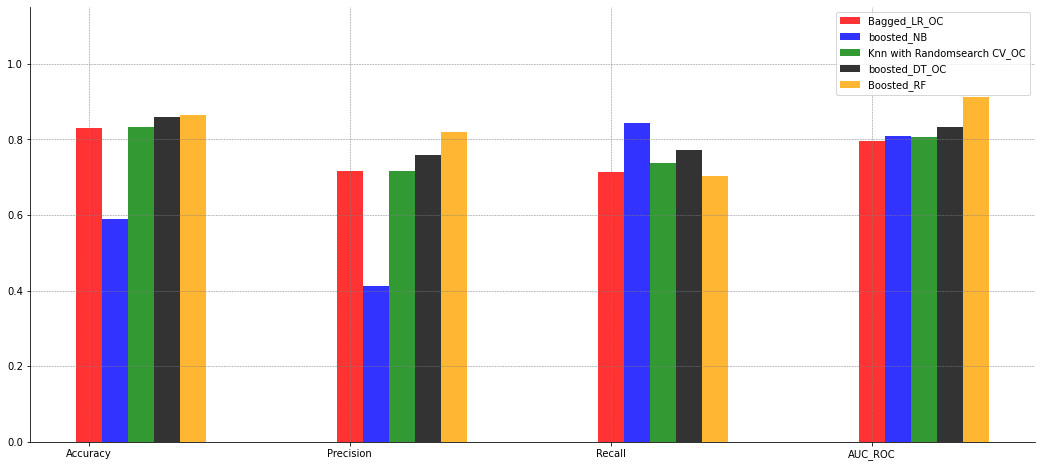

In [59]:
plt.figure(figsize=(18, 8))

ax = plt.subplot(111)

models = fin_comp2.index
values = list(fin_comp2['Bagged_LR_OC'])
model = np.arange(len(fin_comp2))

plt.bar(model, values, align='center', width = 0.1, color = 'red', label= 'Bagged_LR_OC', alpha=0.8)
#----------------
ax = plt.subplot(111)

models = fin_comp2.index
values = list(fin_comp2['boosted_NB'])
model = np.arange(len(fin_comp2))

plt.bar(model+0.1, values, align='center', width = 0.1, color = 'blue', label= 'boosted_NB', alpha=0.8)
#----------------
ax = plt.subplot(111)

models = fin_comp2.index
values = list(fin_comp2['Knn with Randomsearch CV_OC'])
model = np.arange(len(fin_comp2))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.8, color = 'Green', label= 'Knn with Randomsearch CV_OC')
#----------------
ax = plt.subplot(111)

models = fin_comp2.index
values = list(fin_comp2['boosted_DT_OC'])
model = np.arange(len(fin_comp2))

plt.bar(model+0.3, values, align='center', width = 0.1, alpha=0.8, color = 'black', label= 'boosted_DT_OC',orientation = 'vertical')
#----------------
ax = plt.subplot(111)

models = fin_comp2.index
values = list(fin_comp2['Boosted_RF'])
model = np.arange(len(fin_comp2))

plt.bar(model+0.4, values, align='center', width = 0.1, alpha=0.8, color = 'orange', label= 'Boosted_RF',orientation = 'vertical')


plt.xticks(model, models,rotation=0,size=10)
plt.yticks(size=10)
ax.set_ylim(top=1.15)
#----------------
ax = plt.subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 1,prop={'size': 10})
ax.grid(which='major',linestyle='--', linewidth='0.5', color='grey')

plt.show() 

In [57]:
fin_comp2

Model,Bagged_LR_OC,boosted_NB,Knn with Randomsearch CV_OC,boosted_DT_OC,Boosted_RF
Accuracy,0.829626,0.590291,0.833252,0.857891,0.864387
Precision,0.717420,0.411326,0.715146,0.758458,0.819823
Recall,0.713040,0.843021,0.738306,0.772351,0.702409
AUC_ROC,0.796322,0.808558,0.806127,0.833455,0.912479
